<a href="https://colab.research.google.com/github/truong-xuan-linh/CS114.L21/blob/patch-3/plot_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
# Đọc dữ liệu từ file csv
score = pd.read_csv("/content/drive/MyDrive/CS114/Predict_score/score_training.csv")
wecode = pd.read_csv("/content/drive/MyDrive/CS114/Predict_score/wecode.csv")
'''print('Chi tiết bảng wecode: ')
print(wecode)
print("Chi tiết bảng score:")
print(score)'''

'print(\'Chi tiết bảng wecode: \')\nprint(wecode)\nprint("Chi tiết bảng score:")\nprint(score)'

In [7]:
student = pd.DataFrame(wecode['user_id'])
student['sum_problems'] = pd.DataFrame(wecode['is_final'])
student.insert(2,'sum_submits', 1)
student['sum_1000'] = pd.DataFrame(map(int, wecode['pre_score'] == 1000))
student.columns = ['id', 'sum_problems', 'sum_submits', 'sum_1000']

student = student.groupby(['id']).sum()

In [8]:
# Xóa các cột không quan trọng từ file score, giữ lại id và CK
del score['QT'], score['GK'], score['TH'], score['TBM'], score['TBTL']
# Xóa những dòng trong score không chứa điểm CK
score = score.where(score['CK'] != '\xa0') # Xóa ' '
score = score.where(score['CK'] == score['CK']) # Xóa nan


In [9]:
data = pd.merge(student, score, how='inner', on=['id'])
print(data)

       id  sum_problems  sum_submits  sum_1000   CK
0      24            77          164         4  9.5
1      27             5           13         3   10
2      29            80          199         2  8.5
3      34            84          218        11  6.5
4      35           151          297         3  4.5
..    ...           ...          ...       ...  ...
801  1856            31           64         6  7.5
802  1857            40           55         0    4
803  1859            30           31         0  1.5
804  1862             6           12         0  7.5
805  1865            17           99        21  7.5

[806 rows x 5 columns]


In [10]:
data['CK'] = pd.DataFrame(map(float,data['CK']))
data = data.sort_values(by=['CK'])

# **1. Tổng số problem đã solve/ tổng số problem có submit**

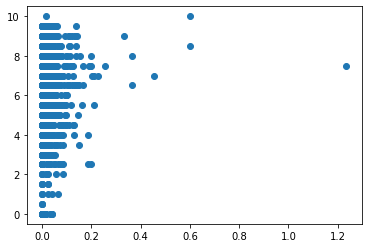

In [11]:
import matplotlib.pyplot as plt

plt.plot(data['sum_1000']/data['sum_problems'], data['CK'] , 'o')
plt.show()

# **2. Tổng số  problem đã submit/ tổng số submission**

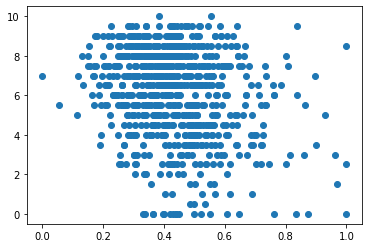

In [12]:
plt.plot(data['sum_problems']/data['sum_submits'], data['CK'] , 'o')
plt.show()

# 3.Số lần submit đúng/ tổng số submission

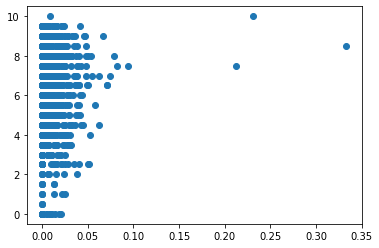

In [13]:
plt.plot(data['sum_1000']/data['sum_submits'], data['CK'] , 'o')
plt.show()

# 4. Tổng số pre_score của các submissionn có is_final = 1

In [20]:
student2 = pd.DataFrame(wecode['user_id'])
student2['sum_is_final_pre_score'] = wecode['is_final']*wecode['pre_score']
student2.columns = ['id', 'sum_is_final_pre_score']
student2 = student2.groupby(['id']).sum()

data2 = pd.merge(student2, score, how='inner', on=['id'])

data2['CK'] = pd.DataFrame(map(float,data2['CK']))
data2 = data2.sort_values(by=['CK'])

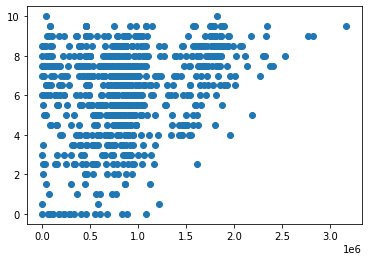

In [21]:
plt.plot(data2['sum_is_final_pre_score'], data2['CK'], 'o')